In [1]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pickle
import pandas as pd
import os

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize


def evaluate_model(y_true, y_pred, y_score=None):
    """
    Evaluate model performance with metrics and visualizations.
    
    y_true: true labels
    y_pred: predicted labels
    y_score: predicted probabilities (required for ROC curves)
    """
    
    # ======== PRINT METRICS ========
    print("\nPerformance on test data:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, average="weighted"))
    print('Recall:', recall_score(y_true, y_pred, average="weighted"))
    
    # ======== CONFUSION MATRIX HEATMAP ========
    cm = confusion_matrix(y_true, y_pred)
    classes = np.unique(y_true)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    


In [3]:
from sklearn.neighbors import KNeighborsClassifier
def train_knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier()
    param_grid = {
        "n_neighbors" : [3, 5, 7, 9, 11],
        "weights" : ["uniform", "distance"],
        "metric" : ["euclidean", "manhattan"]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_

    y_pred = best_knn.predict(X_test)

    print("\nK-Nearest Neighbors")
    print("Best Parameters: ", grid_search.best_params_)

    evaluate_model(y_test, y_pred)
    return best_knn

In [4]:
from sklearn.linear_model import LogisticRegression
def train_logistic_regression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(max_iter=1000)
    param_grid = {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "penalty": ["l2"],
        "solver": ["lbfgs"],
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(lr, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_lr = grid_search.best_estimator_
    y_pred = best_lr.predict(X_test)
    print("\nLogistic Regression:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Validation Score:", grid_search.best_score_)

    evaluate_model(y_test, y_pred)
    return best_lr

In [5]:
from sklearn.svm import LinearSVC
def train_svm(X_train, X_test, y_train, y_test):
    svm = LinearSVC()
    param_grid = {
        "C" : [0.001, 0.01, 0.1, 1, 10]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    print("\nLogistic Regression:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Validation Score:", grid_search.best_score_)

    evaluate_model(y_test, y_pred)
    return best_model

In [6]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier()
    param_grid = {
        "max_depth" : [5, 10, 20]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(tree, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    print("\nLogistic Regression:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Validation Score:", grid_search.best_score_)

    evaluate_model(y_test, y_pred)
    return best_model

In [7]:
X_test = pd.read_csv('./tfidf/test.csv')
y_test = pd.read_csv('./split/test.csv')
y_test = y_test['label']
with open("label_encoder.pkl", "rb") as f:
    y_encoded = pickle.load(f)

dir = './models'
os.makedirs(dir, exist_ok=True)


K-Nearest Neighbors
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Performance on test data:
Confusion Matrix:
[[480  37]
 [150 393]]

Classification Report:
              precision    recall  f1-score   support

        fake       0.76      0.93      0.84       517
        real       0.91      0.72      0.81       543

    accuracy                           0.82      1060
   macro avg       0.84      0.83      0.82      1060
weighted avg       0.84      0.82      0.82      1060

Accuracy:  0.8235849056603773
Precision: 0.839793873670574
Recall: 0.8235849056603773


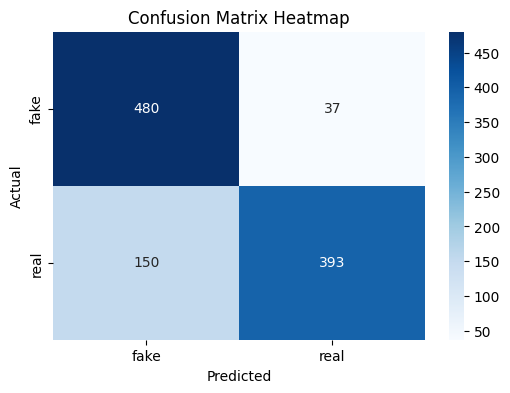

In [8]:
X_train = pd.read_csv("./tfidf/train_1.csv")
y_train = pd.read_csv('./split/train_1.csv')
y_train = y_train['label']

y_train_encoded = y_encoded.transform(y_train)
model1 = train_knn(X_train, X_test, y_train, y_test)
with open("./models/model1.pkl", "wb") as f:
    pickle.dump(model1, f)


Logistic Regression:
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Validation Score: 0.8935010482180294

Performance on test data:
Confusion Matrix:
[[443  74]
 [ 66 477]]

Classification Report:
              precision    recall  f1-score   support

        fake       0.87      0.86      0.86       517
        real       0.87      0.88      0.87       543

    accuracy                           0.87      1060
   macro avg       0.87      0.87      0.87      1060
weighted avg       0.87      0.87      0.87      1060

Accuracy:  0.8679245283018868
Precision: 0.8679595113858838
Recall: 0.8679245283018868


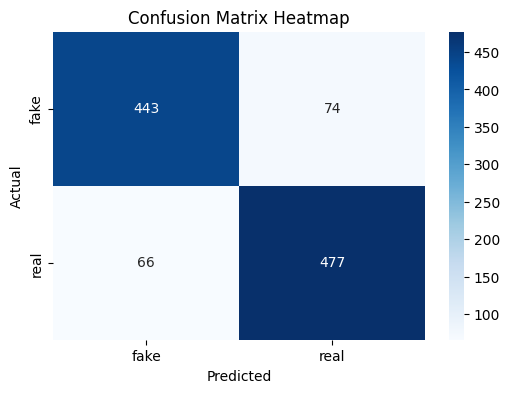

In [9]:
X_train = pd.read_csv("./tfidf/train_2.csv")
y_train = pd.read_csv('./split/train_2.csv')
y_train = y_train['label']
y_train_encoded = y_encoded.transform(y_train)
model2 = train_logistic_regression(X_train, X_test, y_train, y_test)
with open("./models/model2.pkl", "wb") as f:
    pickle.dump(model1, f)


Logistic Regression:
Best Parameters: {'C': 0.1}
Best Validation Score: 0.879245283018868

Performance on test data:
Confusion Matrix:
[[450  67]
 [ 59 484]]

Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.87      0.88       517
        real       0.88      0.89      0.88       543

    accuracy                           0.88      1060
   macro avg       0.88      0.88      0.88      1060
weighted avg       0.88      0.88      0.88      1060

Accuracy:  0.8811320754716981
Precision: 0.8811749701146914
Recall: 0.8811320754716981


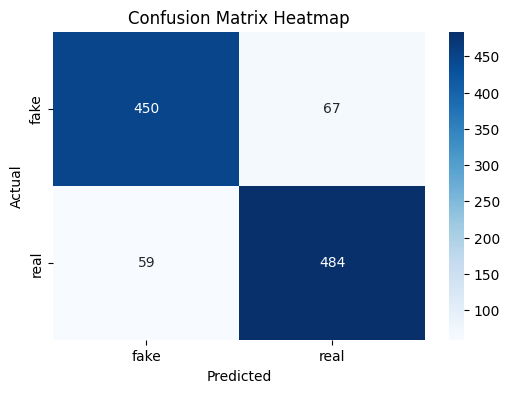

In [10]:
X_train = pd.read_csv("./tfidf/train_3.csv")
y_train = pd.read_csv('./split/train_3.csv')
y_train = y_train['label']
y_train_encoded = y_encoded.transform(y_train)
model3 = train_svm(X_train, X_test, y_train, y_test)
with open("./models/model3.pkl", "wb") as f:
    pickle.dump(model1, f)


Logistic Regression:
Best Parameters: {'max_depth': 20}
Best Validation Score: 0.8306079664570231

Performance on test data:
Confusion Matrix:
[[440  77]
 [124 419]]

Classification Report:
              precision    recall  f1-score   support

        fake       0.78      0.85      0.81       517
        real       0.84      0.77      0.81       543

    accuracy                           0.81      1060
   macro avg       0.81      0.81      0.81      1060
weighted avg       0.81      0.81      0.81      1060

Accuracy:  0.810377358490566
Precision: 0.8132424173260295
Recall: 0.810377358490566


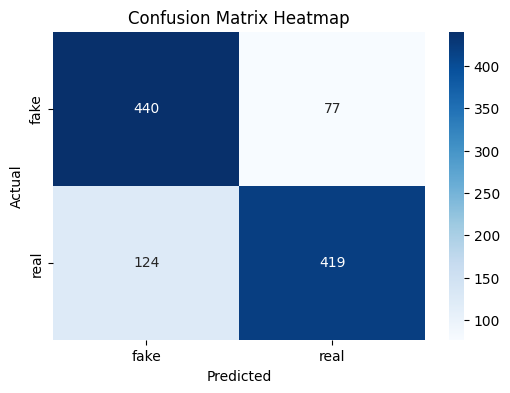

In [11]:
X_train = pd.read_csv("./tfidf/train_4.csv")
y_train = pd.read_csv('./split/train_4.csv')
y_train = y_train['label']
y_train_encoded = y_encoded.transform(y_train)
model4 = train_decision_tree(X_train, X_test, y_train, y_test)
with open("./models/model4.pkl", "wb") as f:
    pickle.dump(model1, f)